<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Máster Universitario en Análisis y Visualización de Datos Masivos/ Visual Analytics and Big Data </header1></center>
<center><h2>Modelo predictivo de zonas de Madrid con mayor incidencia de enfermedades respiratorias </header2><center>
    <center><h3>Zona Sur</header3><center>

Presentado por: Adela Corina Ponce Román y Hugo Gómez Bahamonde<br>
Fecha: 15/01/2025

# Importación de librerias necesarias

In [5]:
import pandas as pd
from pandas import read_csv
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)


2.18.0


In [6]:
# Asegurar que los resultados sean reproducibles
np.random.seed(1234)
tf.random.set_seed(1234)

# I. Análisis exploratorio

## Cargar el Dataset

 La información del conjunto de datos están relacionados con las defunciones mensuales por enfermedades respiratorias y los niveles de concetración de contaminantes (NOX, SOx, PM<2,5, PM<10, Ozono y benceno) por zonas de Madrid. Los niveles de concentración de contaminantes vienen dados en microgramos por metro cúbico. Se trata de un dataset de formato .csv de 7 variables numéricas y 1 categórica con   

In [9]:
#Código para cargar el Dataset
url = 'https://raw.githubusercontent.com/hgba88/TFM/refs/heads/main/Contaminantes_Muertes_pivotado.csv'
dataset = pd.read_csv(url, sep=';')

## Descripción de la fuente del Dataset

In [11]:
print(dataset.shape)

(143, 37)


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Mes                       143 non-null    object 
 1   SO2_InteriorM30           143 non-null    float64
 2   SO2_Norte                 143 non-null    int64  
 3   SO2_Sur                   143 non-null    float64
 4   SO2_Este                  143 non-null    float64
 5   SO2_Oeste                 143 non-null    int64  
 6   NO_InteriorM30            143 non-null    float64
 7   NO_Norte                  143 non-null    float64
 8   NO_Sur                    143 non-null    float64
 9   NO_Este                   143 non-null    float64
 10  NO_Oeste                  143 non-null    float64
 11  O3_InteriorM30            143 non-null    float64
 12  O3_Norte                  143 non-null    float64
 13  O3_Sur                    143 non-null    float64
 14  O3_Este   

In [13]:
# Se cambia el tipo de datos de las columnas tipo object (Mes) --> datetime; las columnas tipo float64 -> int64 
dataset['Mes'] = pd.to_datetime(dataset['Mes'])
dataset['SO2_InteriorM30'] = dataset['SO2_InteriorM30'].astype('int64')
dataset['SO2_Sur'] = dataset['SO2_Sur'].astype('int64')
dataset['SO2_Este'] = dataset['SO2_Este'].astype('int64')
dataset['NO_InteriorM30'] = dataset['NO_InteriorM30'].astype('int64')
dataset['NO_Norte'] = dataset['NO_Norte'].astype('int64')
dataset['NO_Sur'] = dataset['NO_Sur'].astype('int64')
dataset['NO_Este'] = dataset['NO_Este'].astype('int64')
dataset['NO_Oeste'] = dataset['NO_Oeste'].astype('int64')
dataset['O3_InteriorM30'] = dataset['O3_InteriorM30'].astype('int64')
dataset['O3_Norte'] = dataset['O3_Norte'].astype('int64')
dataset['O3_Sur'] = dataset['O3_Sur'].astype('int64')
dataset['O3_Oeste'] = dataset['O3_Oeste'].astype('int64')
dataset['Particulas25_InteriorM30'] = dataset['Particulas25_InteriorM30'].astype('int64')
dataset['Particulas10_InteriorM30'] = dataset['Particulas10_InteriorM30'].astype('int64')
dataset['Particulas10_Norte'] = dataset['Particulas10_Norte'].astype('int64')
dataset['Benceno_InteriorM30'] = dataset['Benceno_InteriorM30'].astype('int64')
dataset['Benceno_Norte'] = dataset['Benceno_Norte'].astype('int64')
dataset['Benceno_Sur'] = dataset['Benceno_Sur'].astype('int64')
dataset['Benceno_Oeste'] = dataset['Benceno_Oeste'].astype('int64')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Mes                       143 non-null    datetime64[ns]
 1   SO2_InteriorM30           143 non-null    int64         
 2   SO2_Norte                 143 non-null    int64         
 3   SO2_Sur                   143 non-null    int64         
 4   SO2_Este                  143 non-null    int64         
 5   SO2_Oeste                 143 non-null    int64         
 6   NO_InteriorM30            143 non-null    int64         
 7   NO_Norte                  143 non-null    int64         
 8   NO_Sur                    143 non-null    int64         
 9   NO_Este                   143 non-null    int64         
 10  NO_Oeste                  143 non-null    int64         
 11  O3_InteriorM30            143 non-null    int64         
 12  O3_Norte              

In [14]:
# Se cambia el tipo de datos de las columnas tipo object (Mes) --> datetime; las columnas tipo float64 -> int64 

dataset['Mes'] = pd.to_datetime(dataset['Mes'])
dataset['SO2_InteriorM30'] = dataset['SO2_InteriorM30'].astype('int64')
dataset['SO2_Sur'] = dataset['SO2_Sur'].astype('int64')
dataset['SO2_Este'] = dataset['SO2_Este'].astype('int64')
dataset['NO_InteriorM30'] = dataset['NO_InteriorM30'].astype('int64')
dataset['NO_Norte'] = dataset['NO_Norte'].astype('int64')
dataset['NO_Sur'] = dataset['NO_Sur'].astype('int64')
dataset['NO_Este'] = dataset['NO_Este'].astype('int64')
dataset['NO_Oeste'] = dataset['NO_Oeste'].astype('int64')
dataset['O3_InteriorM30'] = dataset['O3_InteriorM30'].astype('int64')
dataset['O3_Norte'] = dataset['O3_Norte'].astype('int64')
dataset['O3_Sur'] = dataset['O3_Sur'].astype('int64')
dataset['O3_Oeste'] = dataset['O3_Oeste'].astype('int64')
dataset['Particulas25_InteriorM30'] = dataset['Particulas25_InteriorM30'].astype('int64')
dataset['Particulas10_InteriorM30'] = dataset['Particulas10_InteriorM30'].astype('int64')
dataset['Particulas10_Norte'] = dataset['Particulas10_Norte'].astype('int64')
dataset['Benceno_InteriorM30'] = dataset['Benceno_InteriorM30'].astype('int64')
dataset['Benceno_Norte'] = dataset['Benceno_Norte'].astype('int64')
dataset['Benceno_Sur'] = dataset['Benceno_Sur'].astype('int64')
dataset['Benceno_Oeste'] = dataset['Benceno_Oeste'].astype('int64')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Mes                       143 non-null    datetime64[ns]
 1   SO2_InteriorM30           143 non-null    int64         
 2   SO2_Norte                 143 non-null    int64         
 3   SO2_Sur                   143 non-null    int64         
 4   SO2_Este                  143 non-null    int64         
 5   SO2_Oeste                 143 non-null    int64         
 6   NO_InteriorM30            143 non-null    int64         
 7   NO_Norte                  143 non-null    int64         
 8   NO_Sur                    143 non-null    int64         
 9   NO_Este                   143 non-null    int64         
 10  NO_Oeste                  143 non-null    int64         
 11  O3_InteriorM30            143 non-null    int64         
 12  O3_Norte              

In [15]:
dataset.head()

,Mes,SO2_InteriorM30,SO2_Norte,SO2_Sur,SO2_Este,SO2_Oeste,NO_InteriorM30,NO_Norte,NO_Sur,NO_Este,...,Benceno_Norte,Benceno_Sur,Benceno_Este,Benceno_Oeste,Muertes_InteriorM30,Muertes_Norte,Muertes_Sur,Muertes_Este,Muertes_Oeste,Muertes_Total
0,2010-01-01,14,0,9,13,8,39,47,54,52,...,0,2,0,0,354,14,69,28,22,486
1,2010-02-01,15,0,0,13,0,43,42,52,49,...,0,1,0,0,312,13,61,24,20,429
2,2010-03-01,0,0,0,0,0,40,37,50,44,...,0,1,0,0,305,12,59,24,19,420
3,2010-04-01,10,0,0,12,0,37,33,44,36,...,0,0,0,0,314,13,61,24,20,432
4,2010-05-01,9,10,8,0,11,30,0,34,24,...,0,0,0,0,311,13,60,24,20,428


In [16]:
# Se eliminan los datos del año 2020 por ser datos debidos a la pandemia del covid
# Se dividie el dataset en varios datasets por zonas 
# Dataset sin 2020 debido al covid
fecha_inicio = pd.Timestamp('2020-01-01')
fecha_fin = pd.Timestamp('2020-12-01')
dataset_wo2020 = dataset[~((dataset['Mes'] >= fecha_inicio) & (dataset['Mes'] <= fecha_fin))]
# Del dataset de la zona Sur no incluimos las columnas Particulas25_Oeste, Particulas10_Oeste porque no hay mediciones de las concentraciones de 
# estos contaminantes
dataset_Sur =  dataset_wo2020[['SO2_Sur','NO_Sur','O3_Sur','Particulas25_Sur','Particulas10_Sur','Benceno_Sur','Muertes_Sur']]

In [17]:
print(dataset_Sur)

     SO2_Sur  NO_Sur  O3_Sur  Particulas25_Sur  Particulas10_Sur  Benceno_Sur  \
0          9      54       0                 0                 0            2   
1          0      52       0                 0                 0            1   
2          0      50       0                 0                 0            1   
3          0      44      55                 0                 0            0   
4          8      34      59                 0                 0            0   
..       ...     ...     ...               ...               ...          ...   
138        0       0       0                 0                 0            0   
139        0       0       0                 0                 0            0   
140        0       0       0                 0                 0            0   
141        0       0       0                 0                 0            0   
142        0       0       0                 0                 0            0   

     Muertes_Sur  
0       

In [18]:
dataset_Sur.isna().sum()

SO2_Sur             0
NO_Sur              0
O3_Sur              0
Particulas25_Sur    0
Particulas10_Sur    0
Benceno_Sur         0
Muertes_Sur         0
dtype: int64

In [19]:
 print(dataset_Sur.groupby('SO2_Sur').size())

SO2_Sur
0    125
2      1
3      1
4      2
8      1
9      1
dtype: int64


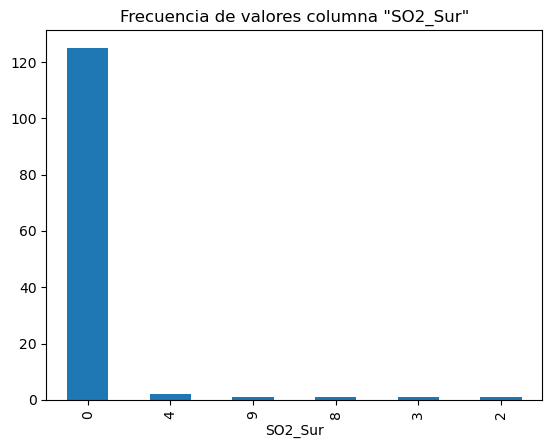

In [20]:
class_counts = dataset_Sur['SO2_Sur'].value_counts()
# Crear el gráfico de barras
class_counts.plot(kind='bar')
# Agregar un título
plt.title('Frecuencia de valores columna "SO2_Sur"')
# Mostrar el gráfico
plt.show() 

In [21]:
 print(dataset_Sur.groupby('NO_Sur').size())

NO_Sur
0     81
27     1
29     1
31     2
32     3
33     1
34     1
35     2
36     1
38     1
39     1
40     1
42     1
43     1
44     2
45     1
46     1
47     2
48     1
50     3
51     1
52     2
54     2
57     1
58     1
59     1
60     1
62     1
63     1
64     1
65     1
66     2
68     1
69     1
70     2
71     1
76     1
78     1
80     1
dtype: int64


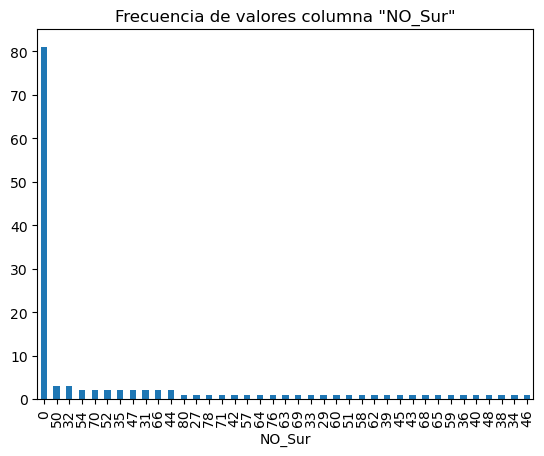

In [22]:
class_counts = dataset_Sur['NO_Sur'].value_counts()
# Crear el gráfico de barras
class_counts.plot(kind='bar')
# Agregar un título
plt.title('Frecuencia de valores columna "NO_Sur"')
# Mostrar el gráfico
plt.show() 

In [23]:
 print(dataset_Sur.groupby('O3_Sur').size())

O3_Sur
0     109
11      1
14      2
16      1
18      1
34      1
48      1
55      1
56      1
59      1
63      1
64      1
65      1
67      2
69      2
74      2
75      1
77      1
78      1
dtype: int64


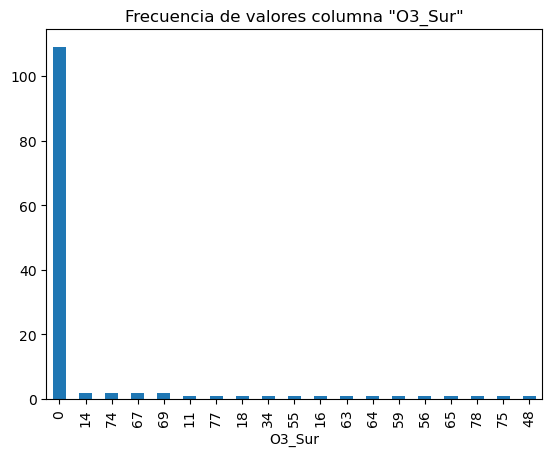

In [24]:
class_counts = dataset_Sur['O3_Sur'].value_counts()
# Crear el gráfico de barras
class_counts.plot(kind='bar')
# Agregar un título
plt.title('Frecuencia de valores columna "O3_Sur"')
# Mostrar el gráfico
plt.show() 

In [25]:
print(dataset_Sur.groupby('Particulas25_Sur').size())

Particulas25_Sur
0    131
dtype: int64


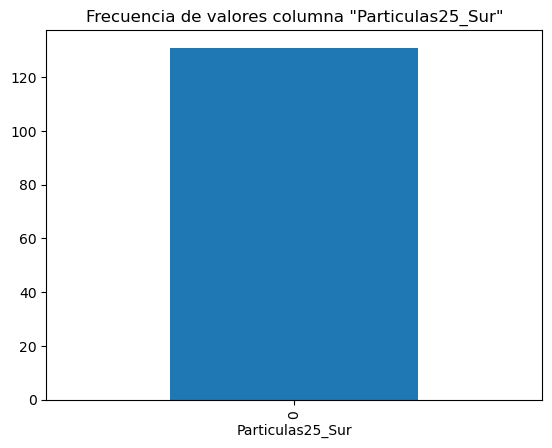

In [26]:
class_counts = dataset_Sur['Particulas25_Sur'].value_counts()
# Crear el gráfico de barras
class_counts.plot(kind='bar')
# Agregar un título
plt.title('Frecuencia de valores columna "Particulas25_Sur"')
# Mostrar el gráfico
plt.show() 

In [27]:
print(dataset_Sur.groupby('Particulas10_Sur').size())

Particulas10_Sur
0    131
dtype: int64


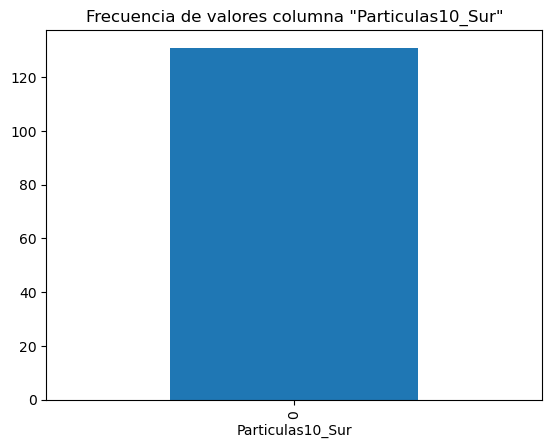

In [28]:
class_counts = dataset_Sur['Particulas10_Sur'].value_counts()
# Crear el gráfico de barras
class_counts.plot(kind='bar')
# Agregar un título
plt.title('Frecuencia de valores columna "Particulas10_Sur"')
# Mostrar el gráfico
plt.show() 

In [29]:
print(dataset_Sur.groupby('Benceno_Sur').size())

Benceno_Sur
0    128
1      2
2      1
dtype: int64


In [30]:
print(dataset_Sur.groupby('Muertes_Sur').size())

Muertes_Sur
52      1
53      1
55      1
56      1
57      3
58      2
59      3
60      7
61      3
62      3
63      6
64      2
65      6
66      2
67      6
68      2
69      4
70      2
71      4
72      4
73      1
74      3
75      3
76     12
77      2
78      3
79      6
80      4
81      1
82      5
83      2
84      1
85      4
86      2
87      3
89      2
90      4
92      1
93      1
97      1
98      1
102     1
106     1
108     1
109     1
115     1
124     1
dtype: int64


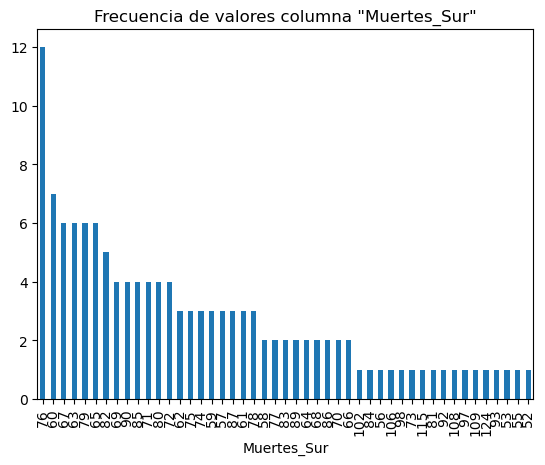

In [31]:
class_counts = dataset_Sur['Muertes_Sur'].value_counts()
# Crear el gráfico de barras
class_counts.plot(kind='bar')
# Agregar un título
plt.title('Frecuencia de valores columna "Muertes_Sur"')
# Mostrar el gráfico
plt.show() 

In [32]:
# La visualizacion de los diferentes valores de las columnas 'Particulas10_Sur' y 'Particulas25_Sur' muestran
# que no hay mediciones de los niveles de contentracion de las particulas < 10 y particulas < 2,5 (los valores son cero),
# por tanto, prescindimos de las columnas anteriores en el dataset_Sur           
dataset_Sur= dataset_Sur.drop(columns=['Particulas10_Sur', 'Particulas25_Sur', ], errors='ignore')
dataset_Sur.head()

,SO2_Sur,NO_Sur,O3_Sur,Benceno_Sur,Muertes_Sur
0,9,54,0,2,69
1,0,52,0,1,61
2,0,50,0,1,59
3,0,44,55,0,61
4,8,34,59,0,60


In [33]:
for column in dataset_Sur.columns:
    # Calcular la media excluyendo los ceros
    media_columna = dataset_Sur[column][dataset_Sur[column] != 0].mean()
    # Reemplazar ceros por la media calculada
    dataset_Sur[column] = dataset_Sur[column].replace(0, media_columna)

In [34]:
print(dataset_Sur)

     SO2_Sur  NO_Sur     O3_Sur  Benceno_Sur  Muertes_Sur
0          9    54.0  53.045455     2.000000           69
1          5    52.0  53.045455     1.000000           61
2          5    50.0  53.045455     1.000000           59
3          5    44.0  55.000000     1.333333           61
4          8    34.0  59.000000     1.333333           60
..       ...     ...        ...          ...          ...
138        5    50.5  53.045455     1.333333           64
139        5    50.5  53.045455     1.333333           52
140        5    50.5  53.045455     1.333333           57
141        5    50.5  53.045455     1.333333           58
142        5    50.5  53.045455     1.333333           71

[131 rows x 5 columns]


# II. RED NEURONAL CON TRES CAPAS

In [36]:
# Se divide el set de datos en un set de entrenamiento y otro de pruebas.
train_dataset = dataset_Sur.sample(frac=0.8,random_state=0)
test_dataset = dataset_Sur.drop(train_dataset.index)

In [37]:
# Estadísticas generales 
# Se separa la variabe 'Muertes_Sur',porque sera la se use para predecir
train_stats = train_dataset.describe()
train_stats.pop("Muertes_Sur")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
SO2_Sur,105.0,5.009524,0.612298,2.0,5.000000,5.000000,5.000000,9.0
NO_Sur,105.0,50.233333,9.101476,27.0,50.500000,50.500000,50.500000,80.0
O3_Sur,105.0,53.581385,7.871378,11.0,53.045455,53.045455,53.045455,77.0
Benceno_Sur,105.0,1.333333,0.080064,1.0,1.333333,1.333333,1.333333,2.0


In [38]:
# Separar el valor objetivo, "Muertes_Sur" de las caracteristicas.
# Esta etiqueta, "Muertes_Sur" es el valor que entrenara el modelo para predecir.
train_labels = train_dataset.pop('Muertes_Sur')
test_labels = test_dataset.pop('Muertes_Sur')


In [39]:
# Normalización del conjunto de datos de entranamientos con las estadísticas media y desviación estándar
# Se han de aplicar a cualquier otro tipo de dato que alimente el modelo, incluye al conjunto de datos de pruebas y
# los datos en vivo cuando el modelo se use en producción.
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [40]:
print (normed_train_data)

      SO2_Sur    NO_Sur    O3_Sur  Benceno_Sur
8   -3.281939 -1.563849 -0.068086          0.0
61  -0.015554  0.029299 -0.068086          0.0
90  -0.015554  0.029299 -0.068086          0.0
106 -0.015554  0.029299 -0.068086          0.0
71  -0.015554  3.270532 -0.068086          0.0
..        ...       ...       ...          ...
80  -0.015554  0.029299 -0.068086          0.0
20  -0.015554  0.029299 -0.068086          0.0
136 -0.015554  0.029299 -0.709073          0.0
72  -0.015554 -0.355254 -0.068086          0.0
77  -0.015554  0.029299 -0.068086          0.0

[105 rows x 4 columns]


In [41]:
print(len(train_dataset.keys()))

4


In [42]:
# Construccion del modelo: se usa un modelo 'secuencial' con dos capas ocultas densamente conectadas
# y una capa de salida que devuelve un único valor continuo. cada capa tienee un tensor de entrada y un tensor de salida.
# Funcion de activación relu y en la primera capa se usa un argumento input_shape
# Los modelos creados con una forma de entrada predefinida como esta siempre tienen pesos (incluso antes de ver los datos) 
# y siempre tienen una forma de salida definida.
# Para compilar el modelo: se especifica la función de pérdida y el optimizador.  
# Los pasos de construcción del modelo se envuelven en una función, build_model
 

def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
      ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [43]:
model = build_model()

In [44]:
# Para imprimir una descripción simple del modelo (inspeccionar el modelo)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,545 (17.75 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
# Probar el modelo con un lote de 10 ejemplos de los datos de entrenamiento. 
# Se llama a model.predict en él.

example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


array([[1.0947245 ],
       [0.01806886],
       [0.01806886],
       [0.01806886],
       [0.9704598 ],
       [0.28258413],
       [0.01806886],
       [0.01581539],
       [0.9040978 ],
       [0.02341235]], dtype=float32)

In [46]:
# Entrenamiento del modelo durante 1000 épocas 
# Se registra la precisión de entrenamiento y validación en el objeto history.
# Display training progress by printing a single dot for each completed epoch

class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 50 == 0: print('')
        print('.', end='')

EPOCHS = 250

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


..................................................
..................................................
..................................................
..................................................
..................................................

In [47]:
# Visualizacion del progreso de entrenamiento del modelo usando
# las estadísticas almacenadas en el objeto history.

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch                      
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
245,159.802689,9.794670,159.802689,102.194420,7.252224,102.194420,245
246,159.764343,9.789512,159.764343,102.194778,7.254714,102.194778,246
247,159.728058,9.789770,159.728058,102.268242,7.259254,102.268242,247
248,159.670395,9.786776,159.670395,102.201866,7.254897,102.201866,248
249,159.642395,9.783171,159.642395,102.350548,7.264884,102.350548,249


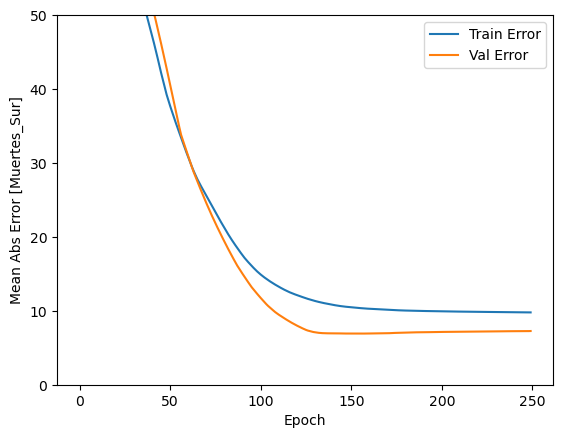

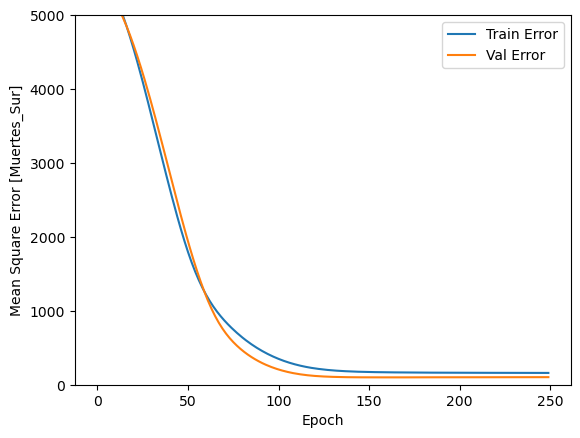

In [48]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [Muertes_Sur]')
    plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
    plt.ylim([0,50])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [Muertes_Sur]')
    plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
    plt.ylim([0,5000])
    plt.legend()
    plt.show()


plot_history(history)

Este gráfico muestra poca mejora, o incluso degradación en el error de validación después de aproximadamente 60 épocas. Actualicemos la llamada model.fit para detener automáticamente el entrenamiento cuando la puntuación de validación no mejore. Utilizaremos una * devolución de llamada de EarlyStopping * que pruebe una condición de entrenamiento para cada época. Si transcurre una cantidad determinada de épocas sin mostrar mejoría, entonces detiene automáticamente el entrenamiento.


..................................................
..................................................
..................................................
...............................

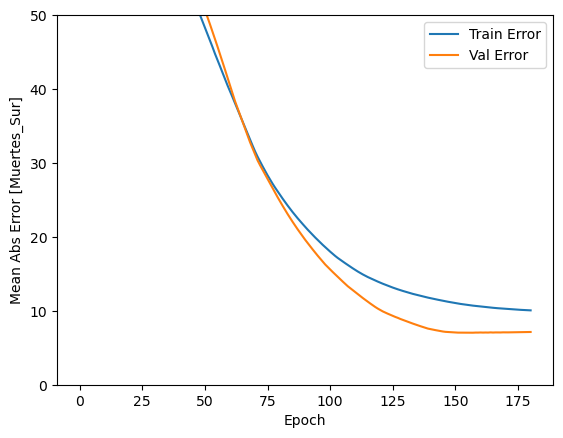

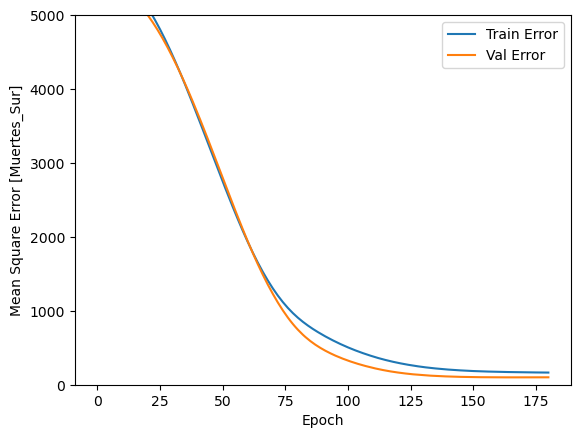

In [50]:
model = build_model()

# El parámetro de paciencia es la cantidad de épocas para comprobar si hay que mejorar.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

El gráfico muestra que en el conjunto de validación, el error promedio generalmente es muy pequeño practicamente coincide las lineas del conjunto de datos de entrenamiento y validación.

Comprobación como de bien generaliza el modelo al usar el conjunto ** test **, que no se uso para entrenar el modelo. Esto nos dice como de bien podemos esperar que el modelo prediga cuándo sea usado en el mundo real.

In [53]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} ".format(mae))

1/1 - 0s - 46ms/step - loss: 104.5306 - mae: 8.6612 - mse: 104.5306
Testing set Mean Abs Error:  8.66 


 Predicción de los valores de Muertes_Sur utilizando datos del conjunto de pruebas:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


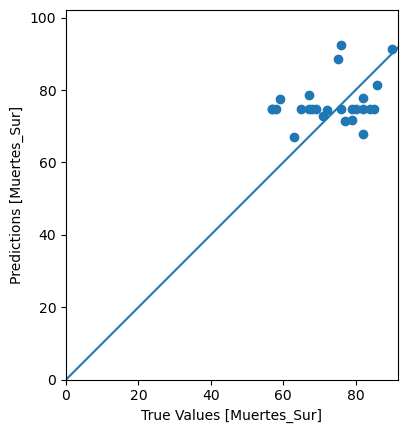

In [55]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Muertes_Sur]')
plt.ylabel('Predictions [Muertes_Sur]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [56]:
test_labels   

9      59
12     75
21     67
25     82
36     72
37     65
39     63
46     69
47     76
58     68
65     85
67     82
70     86
81     76
83     90
87     79
88     79
102    71
103    77
114    82
116    67
117    80
119    84
135    57
140    57
141    58
Name: Muertes_Sur, dtype: int64

Parece que el modelo predice bien en el rango de valores de 'Muertes_InteriorM30' entre 58 y 90. Echemos un vistazo a la distribución de errores.

In [58]:
test_predictions

array([77.547554, 88.574196, 78.62454 , 77.802216, 74.34494 , 74.71462 ,
       67.083015, 74.71462 , 92.45354 , 74.71462 , 74.71462 , 74.71462 ,
       81.477486, 74.71462 , 91.27068 , 71.63006 , 74.71462 , 72.81086 ,
       71.57586 , 67.74737 , 74.71462 , 74.71462 , 74.71462 , 74.71462 ,
       74.71462 , 74.71462 ], dtype=float32)

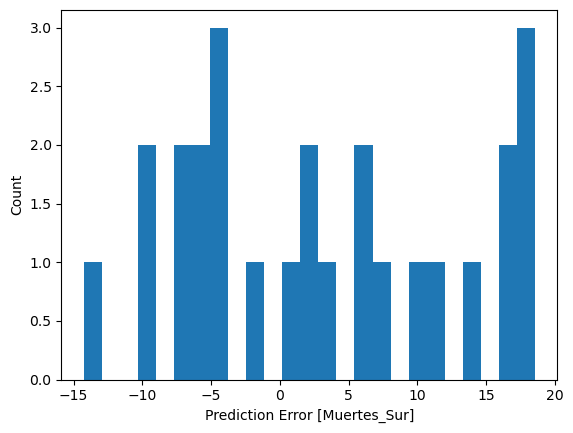

In [59]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Muertes_Sur]")
_ = plt.ylabel("Count")

La distribucion del error es casi una funcion gaussiana

In [61]:
#(Adicional)
# Comparar con otra alternativa 

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

modelRF = RandomForestRegressor(n_estimators=10, random_state=0)

modelRF.fit(train_dataset, train_labels)
preds_test= modelRF.predict(test_dataset)

print('MSE RF : %.3f' % mean_squared_error(test_labels, preds_test, squared=True))
print('MSE DL : %.3f' % mse)
print('MAE RF : %.3f' % mean_absolute_error(test_labels, preds_test))
print('MAE DL : %.3f' % mae)

MSE RF : 129.797
MSE DL : 104.531
MAE RF : 9.671
MAE DL : 8.661


# III. Comparación del desempeño de modelos

Comparación del desempeño de modelos. Se muestra los resultados obtenidos por los diferentes algoritmos escogidos de forma gráfica y comparada/superpuesta.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


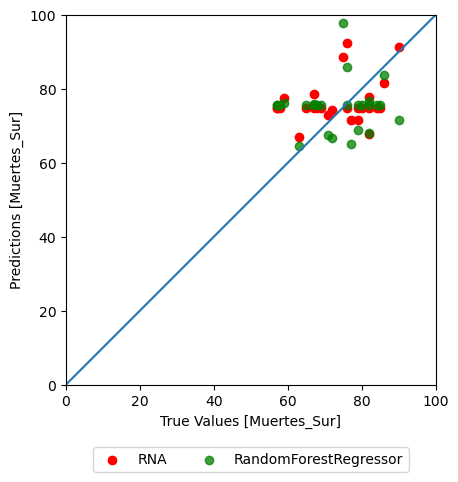

In [64]:
#Código para mostrar la comparación de métricas de desempeño de las dos propuestas en gráfica
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions,c='red',label='RNA')
plt.scatter(test_labels, preds_test,c='green' ,alpha=0.75,label='RandomForestRegressor')
plt.xlabel('True Values [Muertes_Sur]')
plt.ylabel('Predictions [Muertes_Sur]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,100])
plt.ylim([0,100])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),ncol=2)
_ = plt.plot([-100, 100], [-100, 100])

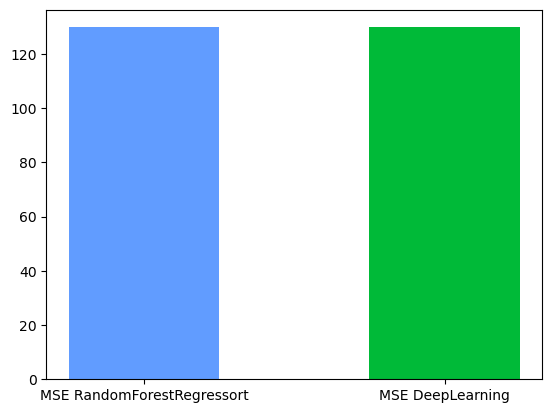

In [65]:
x = ["MSE RandomForestRegressort", "MSE DeepLearning"]
y = [mean_squared_error(test_labels, preds_test, squared=True),mean_squared_error(test_labels, preds_test, squared=True)]

# Gráfico de barras
fig, ax = plt.subplots()
ax.bar(x = x, height = y, width = 0.5,color=["#619cff", "#00ba38"])
plt.show()

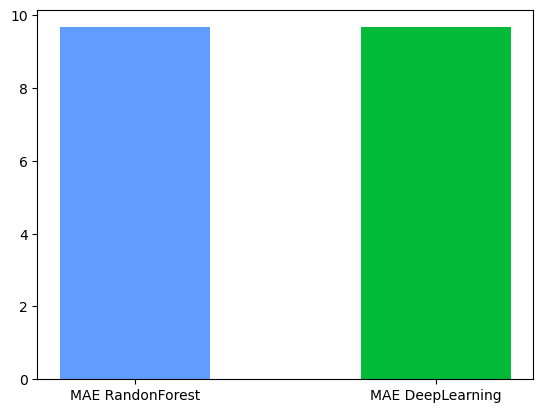

In [66]:
x = ["MAE RandonForest", "MAE DeepLearning"]
y = [mean_absolute_error(test_labels, preds_test), mean_absolute_error(test_labels, preds_test)]

# Gráfico de barras
fig, ax = plt.subplots()
ax.bar(x = x, height = y, width = 0.5, color=["#619cff", "#00ba38"])
plt.show()

# IV. RED NEURONAL CON CUATRO CAPAS

In [68]:
# Se divide el set de datos en un set de entrenamiento y otro de pruebas.
train_dataset = dataset_Sur.sample(frac=0.8,random_state=0)
test_dataset = dataset_Sur.drop(train_dataset.index)
train_dataset

,SO2_Sur,NO_Sur,O3_Sur,Benceno_Sur,Muertes_Sur
8,3,36.0,53.045455,1.333333,53
61,5,50.5,53.045455,1.333333,109
90,5,50.5,53.045455,1.333333,79
106,5,50.5,53.045455,1.333333,79
71,5,80.0,53.045455,1.333333,92
...,...,...,...,...,...
80,5,50.5,53.045455,1.333333,72
20,5,50.5,53.045455,1.333333,58
136,5,50.5,48.000000,1.333333,64
72,5,47.0,53.045455,1.333333,90


In [69]:
# Estadísticas generales 
# Se separa la variabe 'Muertes_Sur',porque sera la se use para predecir
train_stats = train_dataset.describe()
train_stats.pop("Muertes_Sur")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
SO2_Sur,105.0,5.009524,0.612298,2.0,5.000000,5.000000,5.000000,9.0
NO_Sur,105.0,50.233333,9.101476,27.0,50.500000,50.500000,50.500000,80.0
O3_Sur,105.0,53.581385,7.871378,11.0,53.045455,53.045455,53.045455,77.0
Benceno_Sur,105.0,1.333333,0.080064,1.0,1.333333,1.333333,1.333333,2.0


In [70]:
# Separar el valor objetivo, "Muertes_Sur" de las caracteristicas.
# Esta etiqueta, "Muertes_Sur" es el valor que entrenara el modelo para predecir.
train_labels = train_dataset.pop('Muertes_Sur')
test_labels = test_dataset.pop('Muertes_Sur')
train_labels 

8       53
61     109
90      79
106     79
71      92
      ... 
80      72
20      58
136     64
72      90
77      76
Name: Muertes_Sur, Length: 105, dtype: int64

In [71]:
# Normalización del conjunto de datos de entranamientos con las estadísticas media y desviación estándar
# Se han de aplicar a cualquier otro tipo de dato que alimente el modelo, incluye al conjunto de datos de pruebas y
# los datos en vivo cuando el modelo se use en producción.
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [72]:
# Construccion del modelo: se usa un modelo 'secuencial' con TRES capas ocultas densamente conectadas
# y una capa de salida que devuelve un único valor continuo. cada capa tienee un tensor de entrada y un tensor de salida.
# Funcion de activación relu y en la primera capa se usa un argumento input_shape
# Los modelos creados con una forma de entrada predefinida como esta siempre tienen pesos (incluso antes de ver los datos) 
# y siempre tienen una forma de salida definida.
# Para compilar el modelo: se especifica la función de pérdida y el optimizador.  
# Los pasos de construcción del modelo se envuelven en una función, build_model
 

def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
      ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [73]:
model = build_model()

In [74]:
# Para imprimir una descripción simple del modelo (inspeccionar el modelo)
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,705 (34.00 KB)

 Trainable params: 8,705 (34.00 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
# Probar el modelo con un lote de 10 ejemplos de los datos de entrenamiento. 
# Se llama a model.predict en él.

example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


array([[-0.41789693],
       [-0.00628529],
       [-0.00628529],
       [-0.00628529],
       [-0.1396828 ],
       [-0.37270808],
       [-0.00628529],
       [-0.00399055],
       [-0.13031127],
       [-0.00985467]], dtype=float32)

In [76]:
# Entrenamiento del modelo durante 400 épocas 
# Se registra la precisión de entrenamiento y validación en el objeto history.
# Display training progress by printing a single dot for each completed epoch

class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 50 == 0: print('')
        print('.', end='')

EPOCHS = 150
history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


..................................................
..................................................
..................................................

In [77]:
# Visualizacion del progreso de entrenamiento del modelo usando
# las estadísticas almacenadas en el objeto history.

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch                      
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
145,157.618683,9.483522,157.618683,115.134232,8.287093,115.134232,145
146,156.097473,9.470751,156.097473,116.813164,7.929446,116.813164,146
147,157.527374,9.479835,157.527374,115.093956,8.275599,115.093956,147
148,156.022430,9.463565,156.022430,116.638000,7.922538,116.638000,148
149,157.492004,9.481053,157.492004,115.288437,8.294124,115.288437,149


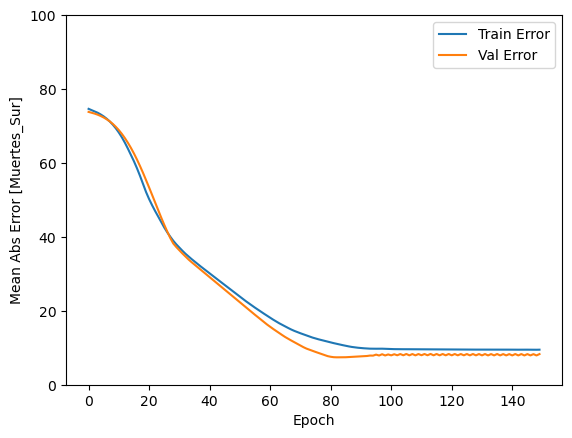

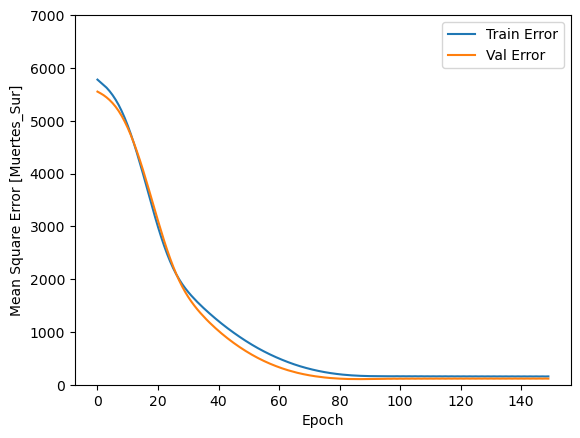

In [78]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [Muertes_Sur]')
    plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
    plt.ylim([0,100])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [Muertes_Sur]')
    plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
    plt.ylim([0,7000])
    plt.legend()
    plt.show()


plot_history(history)


..................................................
.......................................

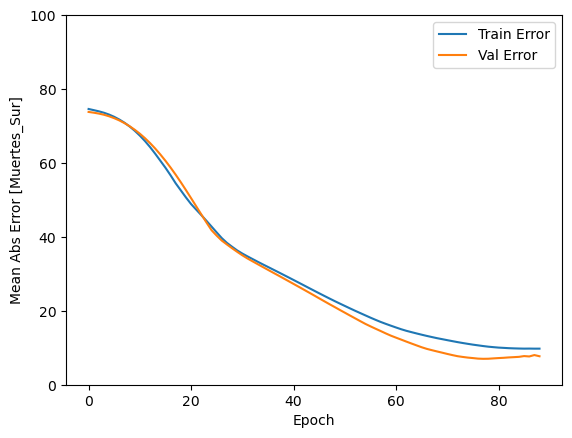

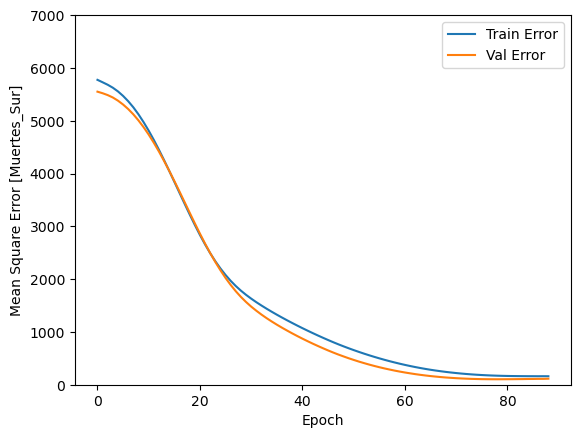

In [79]:
model = build_model()

# El parámetro de paciencia es la cantidad de épocas para comprobar si hay que mejorar.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [80]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} ".format(mae))

1/1 - 0s - 45ms/step - loss: 100.3839 - mae: 8.7551 - mse: 100.3839
Testing set Mean Abs Error:  8.76 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


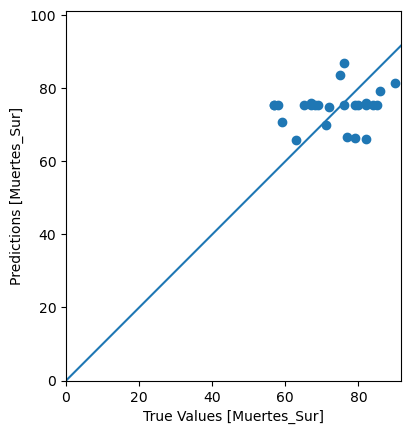

In [81]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels , test_predictions)
plt.xlabel('True Values [Muertes_Sur]')
plt.ylabel('Predictions [Muertes_Sur]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

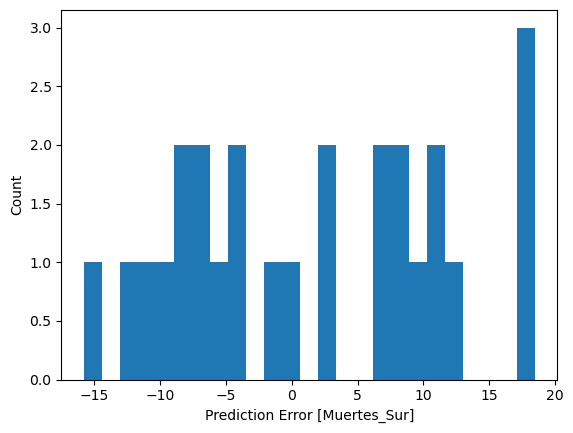

In [82]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Muertes_Sur]")
_ = plt.ylabel("Count")

In [83]:
#(Adicional)
# Comparar con otra alternativa 

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

modelRF = RandomForestRegressor(n_estimators=10, random_state=0)

modelRF.fit(train_dataset, train_labels)
preds_test= modelRF.predict(test_dataset)

print('MSE RF : %.3f' % mean_squared_error(test_labels, preds_test, squared=True))
print('MSE DL : %.3f' % mse)
print('MAE RF : %.3f' % mean_absolute_error(test_labels, preds_test))
print('MAE DL : %.3f' % mae)

MSE RF : 129.797
MSE DL : 100.384
MAE RF : 9.671
MAE DL : 8.755


# V. Comparación del desempeño de modelos

 Comparación del desempeño de modelos. Se muestra los resultados obtenidos por los diferentes algoritmos escogidos de forma gráfica y comparada/superpuesta.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


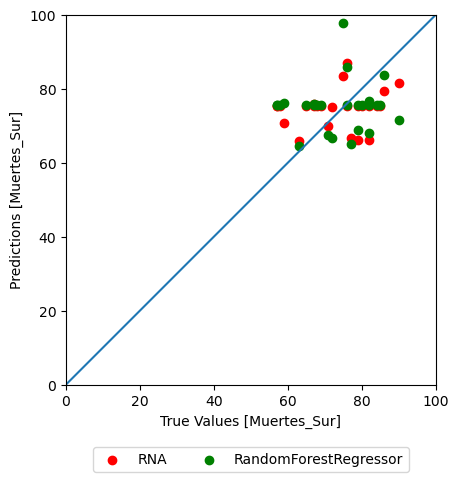

In [86]:
#Código para mostrar la comparación de métricas de desempeño de las dos propuestas en gráfica
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions,c='red',label='RNA')
plt.scatter(test_labels, preds_test,c='green' ,alpha=1,label='RandomForestRegressor')
plt.xlabel('True Values [Muertes_Sur]')
plt.ylabel('Predictions [Muertes_Sur]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,100])
plt.ylim([0,100])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),ncol=2)
_ = plt.plot([-100, 100], [-100, 100])
 

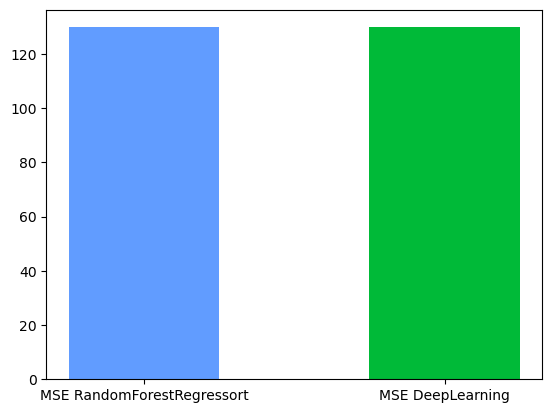

In [87]:
x = ["MSE RandomForestRegressort", "MSE DeepLearning"]
y = [mean_squared_error(test_labels, preds_test, squared=True),mean_squared_error(test_labels, preds_test, squared=True)]

# Gráfico de barras
fig, ax = plt.subplots()
ax.bar(x = x, height = y, width = 0.5,color=["#619cff", "#00ba38"])
plt.show()

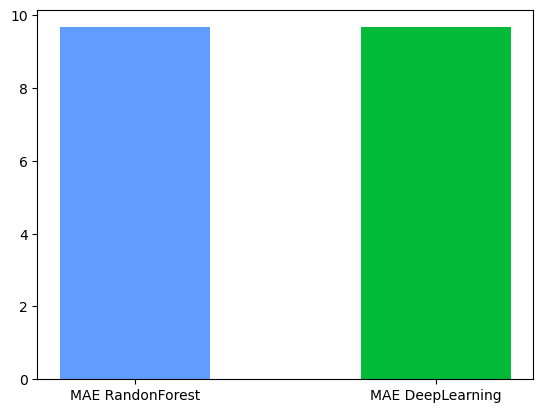

In [88]:
x = ["MAE RandonForest", "MAE DeepLearning"]
y = [mean_absolute_error(test_labels, preds_test), mean_absolute_error(test_labels, preds_test)]

# Gráfico de barras
fig, ax = plt.subplots()
ax.bar(x = x, height = y, width = 0.5, color=["#619cff", "#00ba38"])
plt.show()